---
id: cancer_hcc
title: Detecting Liver Cancer (HCC) in Plasma
description: Classification of liver cancer patients using methylation biomarkers
---
<div style='visibility:hidden' id='notebook-meta' data-filetype='.csv' data-notebook='.ipynb'></div>

by: [Samuel Demharter & Valdemar Stentoft-Hansen](https://www.abzu.ai/team)

Feyn version: 2.1+

Last updated: 23/09/2021

How well does the QLattice deal with highly correlated features in omics data?

In this tutorial we will be exploring this question with a problem and a dataset from the field of liver cancer diagnosis. Namely, classifying Hepatocellular Carcinoma patients using methylation biomarkers as features. This specific example is taken from a study by [Wen, Li, Guo, Liu et al.](https://pubmed.ncbi.nlm.nih.gov/26516143/) and contains data generated by methylated CpG tandems amplification and sequencing (MCTA-Seq), a powerful method that can detect thousands of hypermethylated CpG islands (CGIs) simultaneously in circulating cell-free DNA (ccfDNA).

The original dataset contains thousands of features (CGIs). However, as you will see the model will achieve very high performance with only a handful of them.

In [1]:
import numpy as np
import pandas as pd
import feyn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

## Load the data

Note, the data has been preprocessed and only includes features with high variance. The final curated dataset contains **1712 CGI features** with a binary target of **55 cancer-free** (0) and **36 cancer** (1) individuals. The CGI-features cover the methylated alleles per million mapped reads.

In [2]:
data = pd.read_csv("../data/cancer_hcc.csv")

In [3]:
data.head()

,chr10_102882977_102883551,chr10_102982302_102983600,chr10_105344173_105345039,chr10_106028542_106029047,chr10_112835990_112839303,chr10_11386302_11386875,chr10_115803358_115805468,chr10_11784407_11784937,chr10_11911554_11912432,chr10_124907283_124911035,...,chrX_99661653_99665358,chrX_9982513_9984583,chrY_10032933_10034686,chrY_13470631_13471733,chrY_13488004_13489328,chrY_13585173_13586108,chrY_14100002_14100593,chrY_15863345_15864834,chrY_28555535_28555932,target
0,26,37,56,68,123,316,46,14,306,53,...,25,0,690,184,210,176,169,187,44,1
1,90,42,51,113,70,174,50,5,146,53,...,15,0,346,166,82,162,140,52,15,1
2,10,32,34,4,192,242,29,73,103,76,...,221,95,382,92,260,0,0,0,0,1
3,15,30,75,32,234,342,36,101,373,41,...,15,0,421,291,292,195,162,298,53,1
4,54,105,107,151,199,252,129,136,310,34,...,103,1,488,312,282,296,262,188,46,1


## Split dataset into train and test set

In [4]:
random_seed = 42
train, test = train_test_split(data, test_size = 0.33, stratify=data["target"], random_state=random_seed)

## Train the QLattice

In [5]:
ql = feyn.connect_qlattice()
ql.reset(random_seed = 42)

In [6]:
models = ql.auto_run(
    data=train,
    output_name='target',
    kind='classification',
    criterion='bic',
    max_complexity=4
    )

From here we choose the best fitting graph on the training set as per the bayesian information criterion stated in the `ql.auto_run()`-call. The [bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) is used as a balancing measure between fitness and complexity, penalising more complex models. We are looking for simple models because of their tendency to generalise better to unseen data – following the [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor) principles.

In [7]:
# Choose the best model
best = models[0]

## Evaluating graph performance

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 621 216.0" width="621" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="351" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="50.0"><title>target
logistic:
w=-14.4980
bias=1.2122</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">target</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="59.0">out</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">1</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>chr9_72131221_72132174
linear:
scale=0.003883
scale offset=392.750000
w=1.110990
bias=0.4624</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">chr9_721..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>chr17_59473060_59483266
linear:
scale=0.001503
scale offset=164.500000
w=-7.718259
bias=-1.1074</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">chr17_59..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" height="79" width="180" x="351" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">1.0</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">1.0</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="64">1.0</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="79">Recall</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="79">1.0</text></svg><svg class="summary" height="79" width="90" x="531" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anc
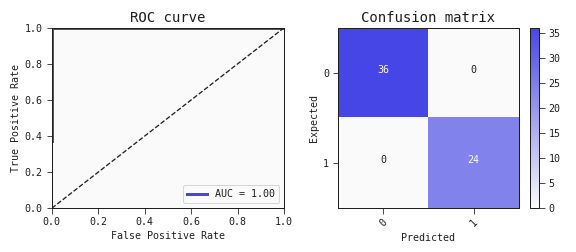
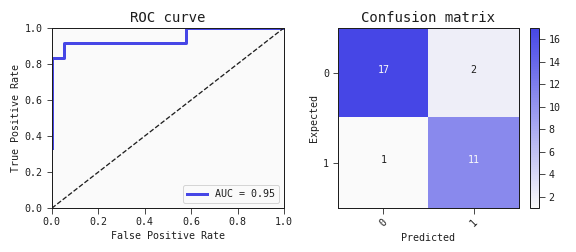

In [8]:
best.plot(train, test)

This two-feature model is the top performer and delivers an almost perfect AUC-score on our holdout-set. Notice that in this process we are boiling 1712 features down to two, drastically removing redundant variance.

In our terminology, *model* is just another word for mathematical *formula*. We can print our model as a mathematical function with the `sympify` call as shown below.

In [9]:
best.sympify(signif = 2)

logreg(0.17*chr175947306059483266 - 0.063*chr97213122172132174 + 7.5)

## Why would our graph pick up these two features?

Let's have a look - the seaborn pairplot is a useful tool for this. The pairplot shows the density and scatter plots revealing the relationships between the features.

In [10]:
# Filter only graph features and target
features_data = train[best.features + ["target"]]

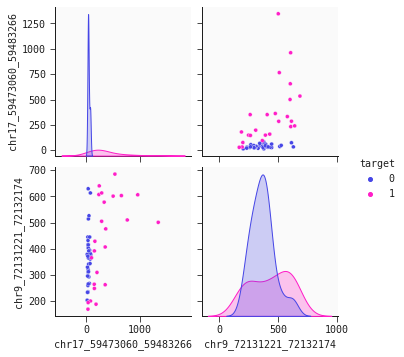

In [11]:
# Pairplot with target coloring
sns.pairplot(features_data, hue = 'target')

The chromosome 17 feature ('chr17...') is the primary separator out of our two features. Non-cancer individuals have a stable low level values methylated alleles ppm whereas cancer individuals generally have higher, more varying levels of this feature. However, this is not the whole story. We observe that some cancer individuals have low levels of 'chr17...'. To identify cancer individuals with low level of 'chr17...' our model's second feature 'chr9...' offers a solution: There is tendency that lower levels of 'chr9...' identify cancer individuals. This dynamic is captured well in the 2d partial plot shown below:

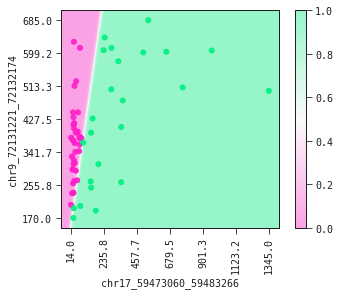

In [12]:
# Plot a 2-dimensional partial plot
best.plot_response_2d(train)

The partial plot displays the decision boundary determined by our model. If you were to draw the decision boundary yourself it would not look much different from what our model has produced. This is a fine sanity check of your model.

## Exploring the multicollinearity

There might be competing models with similar performance metrics – especially in a case like this, where there are many features with potentially high correlation between them. This phenomenon is also known as [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#:~:text=Multicollinearity%20refers%20to%20a%20situation,equal%20to%201%20or%20%E2%88%921.). 

In the following code we will plot a correlation heatmap of the data in an attempt to understand how the `QLattice` is finding high performance with only two features.

In [13]:
# Take a random subset of 100 features
data_wo_target = data.drop('target', axis = 1)
sampled_features = np.unique(list(np.random.choice(data_wo_target.columns, 100, replace=False)) + best.features)
sample_data = data[sampled_features]

In [14]:
# Prepare for labelling the two model features in the heatmap
label_feature = list()

for x, i in enumerate(sampled_features):
    if i in best.features:
        label_feature.append(1)
    else: label_feature.append(0)

# Assign colors to chosen features
lut = dict({0: 'w',
           1: 'b'})

# Map colors to correlation data
row_coloring = pd.Series(label_feature, index = sample_data.corr().index).map(lut)

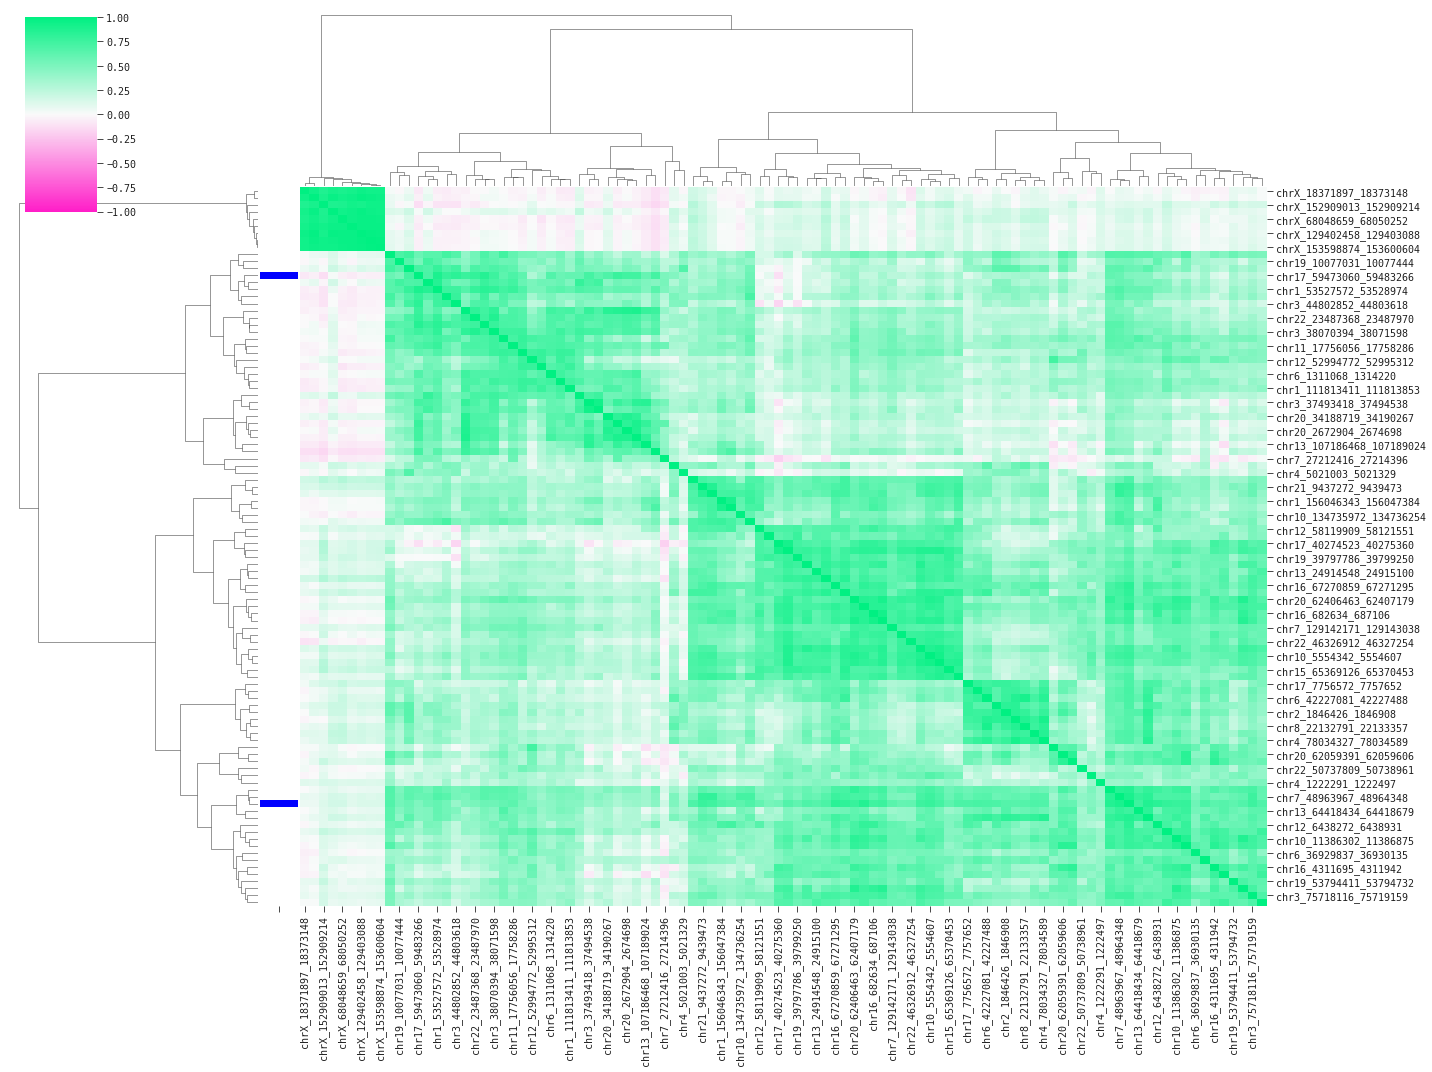

In [15]:
p = sns.clustermap(sample_data.corr(), method="ward", cmap='feyn-diverging', row_colors = row_coloring,
               vmin=-1, vmax=1, figsize=(20,15))

Above we are displaying pairwise correlations between a random subset of 100 features including the two model features (blue bars on the left). The heavy green colors indicate high positive correlation between the features; multicollinearity confirmed. The plot clusters the features based on similarity – in this case using pearson correlation – and sorts the features accordingly. We find two main groups of linear feature variance as displayed by the top branches in the dendrogram. You could suspect the QLattice digging for signal in the available variance across these groups, and it turns out that QLattice does exactly that by picking one feature from each main group.

## Conclusion

In this tutorial we have gone through the QLattice workflow for exploring the relationships in our omics data. In 10 minutes of modelling time we have gone from *1712 features* to pinpointing *two features* that in conjunction provide a competetive and interpretable model.

We have made use of a range of in-built plotting functions that have helped in interpreting our model and the relationships between features. We are now in the position to build on our findings to further improve our working theory and ultimately our predictions.

At Abzu we are exploring similar use cases to help researchers understand the underlying mechanisms in their omics data. If you are dealing with similar challenges why not reach out and/or sign up for a [QLattice trial](https://www.abzu.ai/pricing)?